# Распознавание образов #4
#### Напылов Евгений 381806-2

PCA   
https://docs.yandex.ru/docs/view?url=ya-disk-public%3A%2F%2FpwH6tnv5Qr9c1EdESj5WEYwiPWAsYfjYmC3qnAPJxeea%2Bs5oX49voZLpNOnaB2kkq%2FJ6bpmRyOJonT3VoXnDag%3D%3D&name=%D0%BB%D0%B0%D0%B14.docx&nosw=1

In [1]:
from torchvision import datasets
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import torch.utils.data as data
import numpy as np
import tqdm
from sklearn.decomposition import PCA

In [2]:
dataset = datasets.MNIST('data', download=True)

In [3]:
len(dataset)

60000

In [4]:
def show(image, label):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap="binary")
    plt.text(0, 27, label, color = 'g')

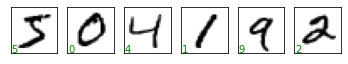

In [5]:
N = 6
plt.figure(figsize=(10,6))
for i in range(N):
    plt.subplot(6, 10, i + 1)
    show(dataset[i][0], dataset[i][1])

### Разбиваем данные

In [6]:
ratio = 0.7
train_size = int(ratio * len(dataset))
test_size = len(dataset) - train_size
train_size, test_size

(42000, 18000)

In [7]:
train, test = data.random_split(dataset, [train_size, test_size])

In [8]:
train = np.array(train)
test = np.array(test)

C:\Users\veter\AppData\Local\Temp/ipykernel_13356/497745403.py:1: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  train = np.array(train)
C:\Users\veter\AppData\Local\Temp/ipykernel_13356/497745403.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array(train)
C:\Users\veter\AppData\Local\Temp/ipykernel_13356/497745403.py:2: FutureWarning: The input object 

In [9]:
train.shape

(42000, 2)

In [10]:
x_train = train[:, 0]
y_train = train[:, 1]
y_train = y_train.astype('int')
x_train = np.stack(x_train)
x_train = x_train.reshape((x_train.shape[0], -1))

In [11]:
x_train.shape

(42000, 784)

In [12]:
x_test = test[:, 0]
y_test = test[:, 1]
y_test = y_test.astype('int')
x_test = np.stack(x_test)
x_test = x_test.reshape((x_test.shape[0], -1))

In [13]:
x_test.shape

(18000, 784)

In [14]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
y_train

array([6, 1, 6, ..., 5, 3, 4])

### Выделение главных компонент

In [16]:
pca = PCA(n_components=28*28)
pca.fit(x_train)

PCA(n_components=784)

In [17]:
components = pca.components_[:7, :]

In [18]:
components.shape

(7, 784)

#### Отображение первых 7-ми компонент в виде картинок

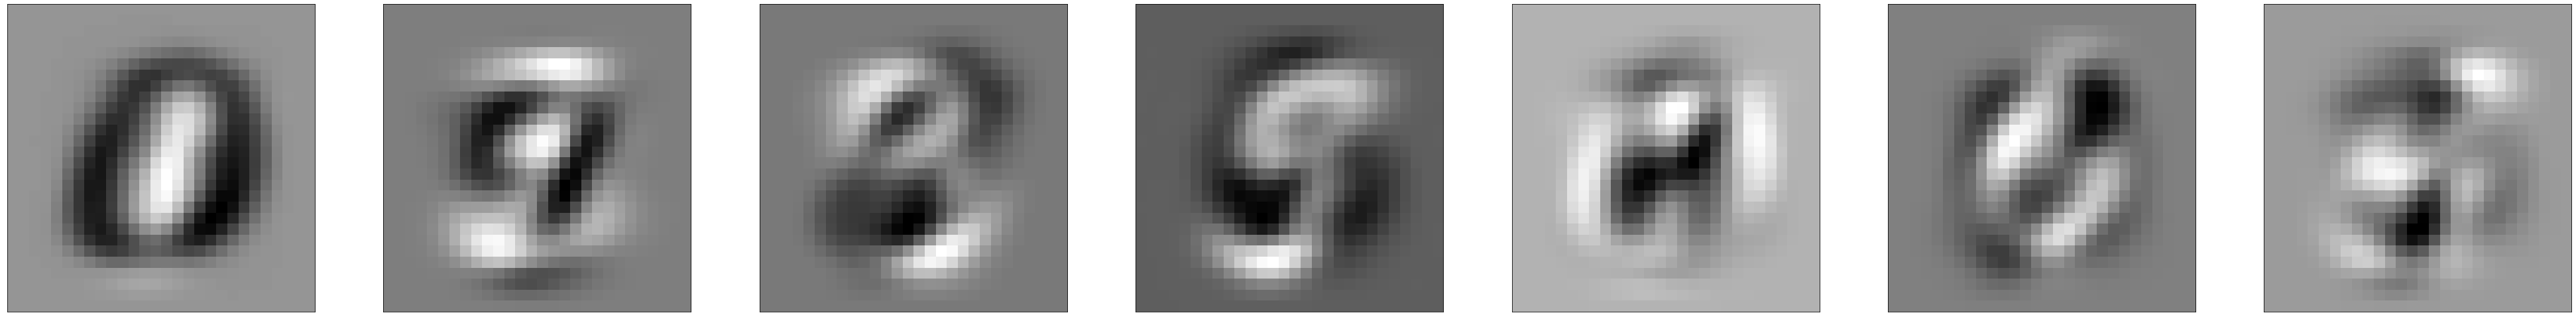

In [19]:
plt.figure(figsize=(100,70))
i = 0
for v in components:
    image = np.reshape(v, (28, 28))
    plt.subplot(7, 10, i + 1)
    show(image, "")
    i+=1

#### График дисперсии первых 100 компонент

In [22]:
disp = pca.explained_variance_ratio_[:100]
disp.shape

(100,)

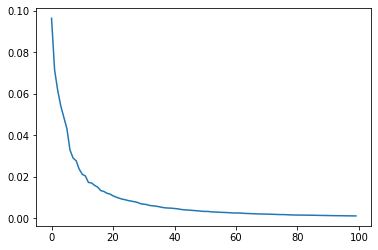

In [23]:
plt.plot(list(range(100)), disp)

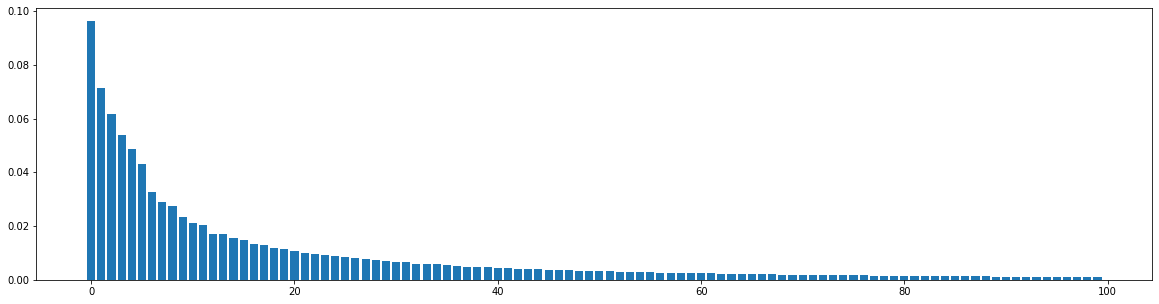

In [24]:
fig, ax = plt.subplots()
ax.bar(list(range(100)), disp)
fig.set_figwidth(20)
fig.set_figheight(5)
plt.show()

Из графиков видно, что самые важные компоненты находятся в начале массива.

#### Проецирование тестового набора на первые 2 компоненты

In [25]:
x_test_projected = pca.transform(x_test)

In [26]:
x_test_projected.shape

(18000, 784)

In [27]:
x_test_projected = x_test_projected[:, :2]

In [28]:
x_test_projected.shape

(18000, 2)

In [29]:
def plot_sets(x_test_projected, y_test, count):
    colors = ["b", "g", "r", "c", "m", "y", "lightgreen", "tomato", "olive", "coral"]
    fig, ax = plt.subplots()
    uniq = []
    for i in tqdm.notebook.tqdm(range(x_test_projected[:count].shape[0])):
        if y_test[i] not in uniq:
            uniq.append(y_test[i])
            ax.scatter(x_test_projected[i][0], x_test_projected[i][1], color=colors[y_test[i]], s=10, label=str(y_test[i]))
        else:
            ax.scatter(x_test_projected[i][0], x_test_projected[i][1], color=colors[y_test[i]], s=10)
    ax.legend(loc=5, framealpha=1)
    plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

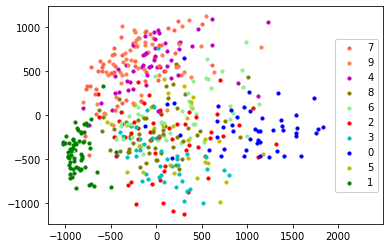

In [30]:
plot_sets(x_test_projected, y_test, 500)

  0%|          | 0/2000 [00:00<?, ?it/s]

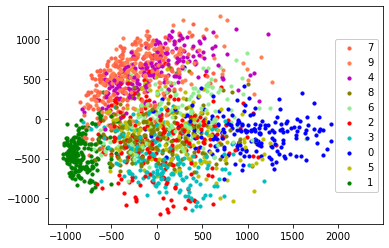

In [31]:
plot_sets(x_test_projected, y_test, 2000)

  0%|          | 0/18000 [00:00<?, ?it/s]

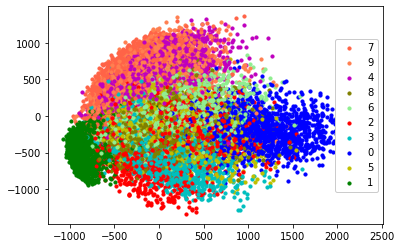

In [32]:
plot_sets(x_test_projected, y_test, x_test_projected.shape[0])

#### Вывод
В результате проецирования тестовых данных на 2 первые главные компоненты удалось получить графическое предстваление данных.

Некоторые облака можно назвать хорошо отделимыми (относительно хорошо) - цифры: 0, 1, 2, 3, 7. Другие цифры достаточно сильно перемешаны.   

Результаты не идеальны, т.к. размерность очень сильно понизилась 784->2 (в 392 раза). В целом метод смог дать представление о датасете, но он далек от идеала.


#### Мне стало интересно, что будет, если обучить KNN на 10-ти компонентах

In [33]:
x_train_projected = pca.transform(x_train)[:, :10]
x_test_projected = pca.transform(x_test)[:, :10]

In [34]:
neighbors_list = list(range(1, 11)) + list(range(10, 50, 5))
err_train = []
err_test = []
for k in tqdm.notebook.tqdm(neighbors_list):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(x_train_projected, y_train)
    err_train.append(np.mean(model.predict(x_train_projected) != y_train))
    err_test.append(np.mean(model.predict(x_test_projected) != y_test))
opt_n_neighbors = neighbors_list[np.argmin(err_test)]
print(opt_n_neighbors)
knn = KNeighborsClassifier(n_neighbors=opt_n_neighbors)
knn.fit(x_train_projected, y_train)

  0%|          | 0/18 [00:00<?, ?it/s]

8


KNeighborsClassifier(n_neighbors=8)

In [35]:
%%time
y_test_predict = knn.predict(x_test_projected)

Wall time: 2.32 s


In [36]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1776
           1       0.97      0.99      0.98      2050
           2       0.95      0.95      0.95      1836
           3       0.92      0.87      0.89      1759
           4       0.92      0.91      0.92      1724
           5       0.92      0.91      0.91      1652
           6       0.96      0.97      0.97      1784
           7       0.95      0.94      0.95      1912
           8       0.90      0.89      0.89      1760
           9       0.87      0.88      0.88      1747

    accuracy                           0.93     18000
   macro avg       0.93      0.93      0.93     18000
weighted avg       0.93      0.93      0.93     18000



#### Сравнение с обучением на исходном датасете

In [37]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
%%time
y_test_predict = knn.predict(x_test)

Wall time: 13.9 s


In [39]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1776
           1       0.96      1.00      0.98      2050
           2       0.98      0.97      0.97      1836
           3       0.96      0.96      0.96      1759
           4       0.97      0.97      0.97      1724
           5       0.96      0.96      0.96      1652
           6       0.98      0.99      0.99      1784
           7       0.97      0.97      0.97      1912
           8       0.99      0.92      0.95      1760
           9       0.95      0.96      0.95      1747

    accuracy                           0.97     18000
   macro avg       0.97      0.97      0.97     18000
weighted avg       0.97      0.97      0.97     18000



Accuracy: 0.93  vs 0.97

Time: 1.99s vs 13.8s